# RP33 analysis and 2D graphics


The objective of this example is to present problem 33 of the BBRC.

In [1]:
import openturns as ot
import numpy as np
import otbenchmark as otb

In [2]:
problem = otb.ReliabilityProblem33()

In [3]:
print(problem)

name = RP33
event = class=ThresholdEventImplementation antecedent=class=CompositeRandomVector function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x1,x2,x3,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2,x3] outputVariablesNames=[y0] formulas=[min(-x1 - x2 - x3 + 3 * sqrt(3), -x3 + 3)] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2,x3] outputVariablesNames=[y0] formulas=[min(-x1 - x2 - x3 + 3 * sqrt(3), -x3 + 3)] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2,x3] outputVariablesNames=[y0] formulas=[min(-x1 - x2 - x3 + 3 * sqrt(3), -x3 + 3)] antecedent=class=UsualRandomVector distribution=class=ComposedDistribution name=ComposedDistribution dimension=3 copula=class=IndependentCopula name=IndependentCopula dimension=3 

In [4]:
event = problem.getEvent()
g = event.getFunction()

In [5]:
problem.getProbability()

0.00257

In [6]:
inputVector = event.getAntecedent()
distribution = inputVector.getDistribution()

In [7]:
inputDimension = distribution.getDimension()
inputDimension

3

In [8]:
alpha = 1 - 0.00001

In [9]:
bounds, marginalProb = distribution.computeMinimumVolumeIntervalWithMarginalProbability(
    alpha
)

In [10]:
referencePoint = distribution.getMean()
referencePoint

class=Point name=Unnamed dimension=3 values=[0,0,0]

/home/osboxes/Documents/venvbbrc/lib/python3.7/site-packages/matplotlib/contour.py:1226: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


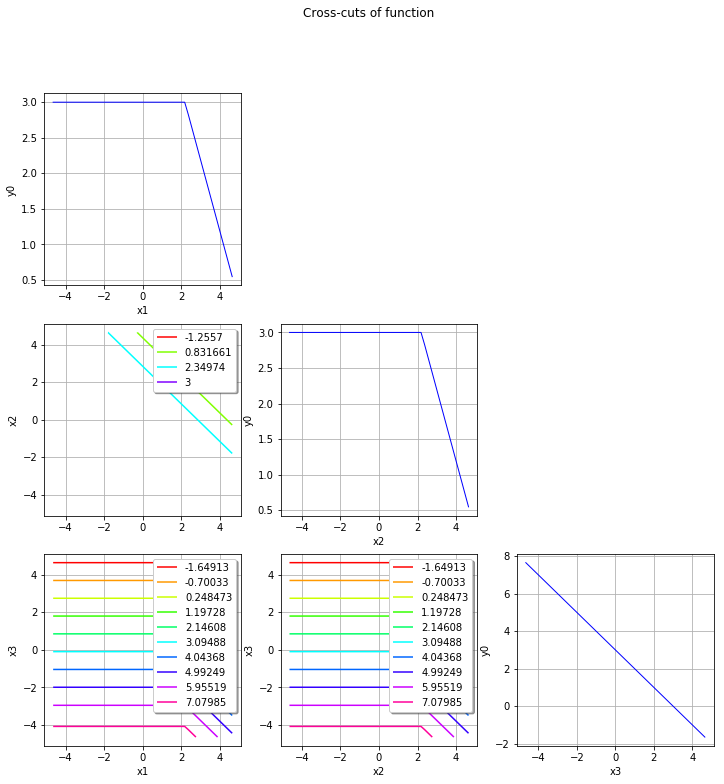

In [11]:
crossCut = otb.CrossCutFunction(g, referencePoint)
_ = crossCut.draw(bounds)

## Plot cross-cuts of the distribution

In [12]:
crossCut = otb.CrossCutDistribution(distribution)

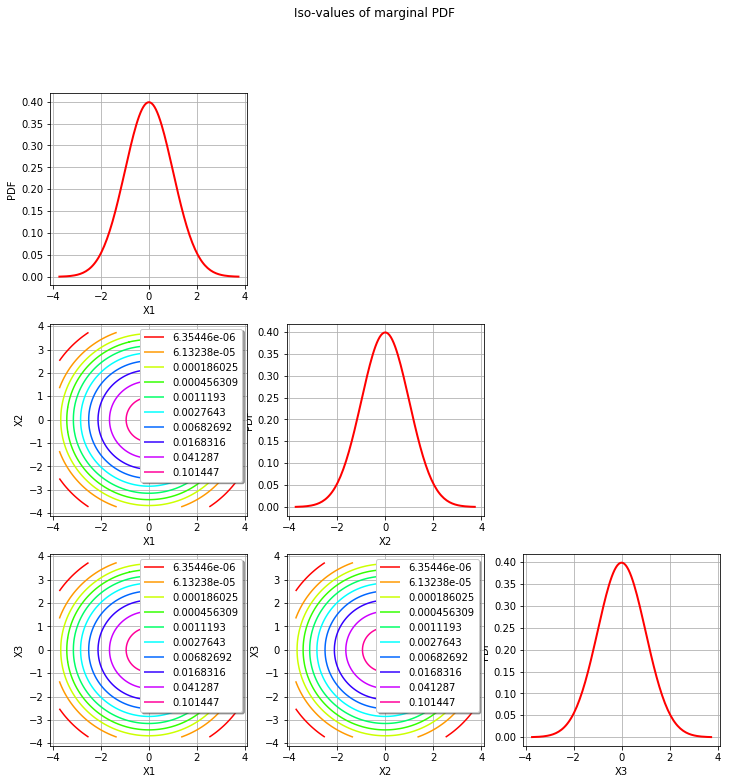

In [13]:
_ = crossCut.drawMarginalPDF()

In [14]:
inputVector = event.getAntecedent()
event = problem.getEvent()
g = event.getFunction()

In [15]:
sampleSize = 5000
sampleInput = inputVector.getSample(sampleSize)
sampleOutput = g(sampleInput)
drawEvent = otb.DrawEvent(event)

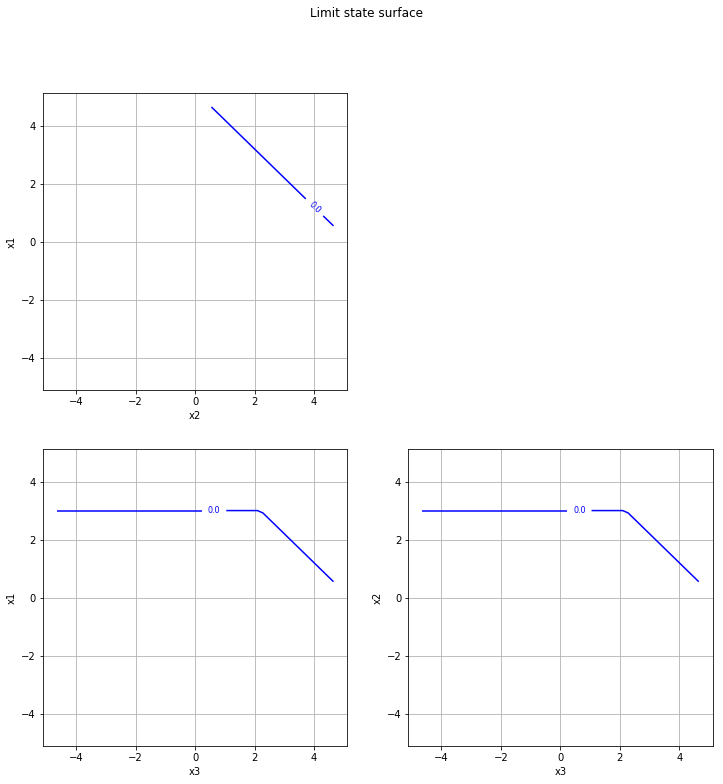

In [16]:
_ = drawEvent.drawLimitState(bounds)

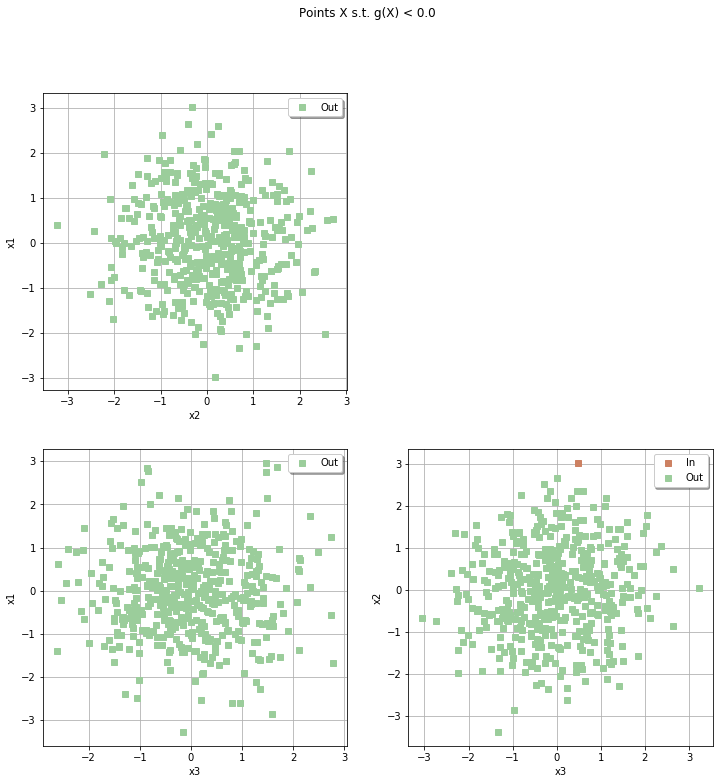

In [17]:
sampleSize = 500
_ = drawEvent.drawSample(sampleSize)

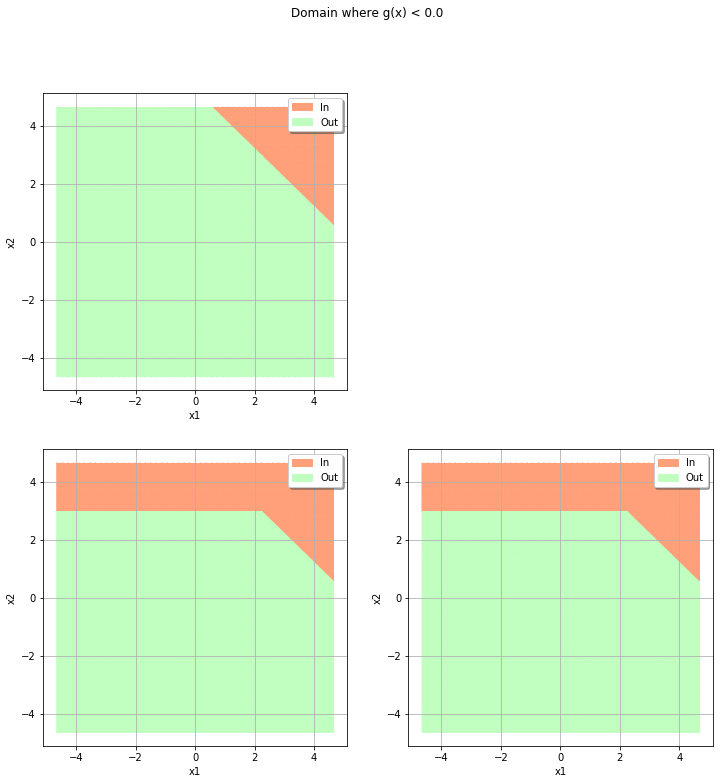

In [18]:
_ = drawEvent.fillEvent(bounds)